In [7]:
import matplotlib

In [8]:
print(matplotlib.__path__)

['F:\\Anaconda3\\lib\\site-packages\\matplotlib']


In [9]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [10]:
city_location = dict()

In [11]:
import re

 ### 使用正则匹配想要的数据

In [12]:
string_pattern = "name:'(\w+)',\s+geoCoord:\[(\d+)\.(\d+)d+)\.(\d+)\]"

In [13]:
for line in coordination_source.split('\n'):
    city_info = re.findall(r"name:'(\w+)',\s+geoCoord:\[(\d+\.?\d+),\s+(\d+\.?\d+)\]", line)
    if not city_info: continue
    city, lat, long = city_info[0]
    lat, long = float(lat), float(long)
    city_location[city] = (lat, long)

In [14]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [15]:
import math

### 计算起始点到终点的距离

In [16]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [17]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city2], city_location[city1])

In [18]:
get_geo_distance("上海", "杭州")

153.5185697155768

### 使用networkx显示城市地图

In [19]:
import networkx as nx

In [20]:
city_graph = nx.Graph()

In [21]:
city_graph.add_nodes_from(list(city_location.keys()))

### 解决networkx中文显示的方法

In [22]:
#以下两句是显示中文的方法
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']   #有效的方法

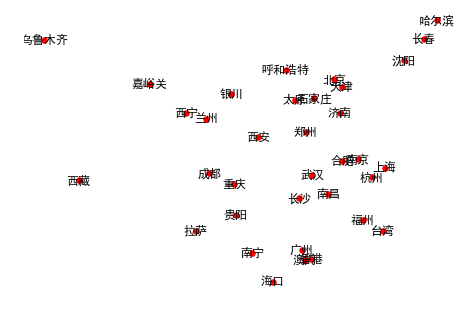

In [23]:
nx.draw(city_graph, city_location, with_labels = True, node_size = 30)

### 设置thereshold，连接满足要求的城市

In [24]:
from collections import defaultdict

In [25]:
threshold = 300

In [26]:
city_connection = defaultdict(list)

In [27]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        distance = get_geo_distance(c1, c2)
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [28]:
city_connection

defaultdict(list,
            {'兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '西宁': ['兰州', '兰州', '成都', '拉萨', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '银川': ['兰州', '重庆', '兰州', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '重庆': ['成都', '贵阳', '成都', '贵阳', '银川', '银川'],
             '石家庄': ['郑州', '济南', '太原', '北京', '郑州', '济南', '太原', '北京'],
             '郑州': ['石家庄', '武汉', '石家庄', '武汉', '长沙', '太原', '长沙', '太原'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],
             '北京': ['石家庄', '济南', '石家庄', '济南', '天津', '天津'],
             '贵阳': ['重庆', '南宁', '重庆', '南宁'],
             '南宁': ['贵阳', '海口', '贵阳', '海口'],
             '武汉': ['郑州', '南昌', '长沙', '郑州', '南昌', '长沙'],
             '南昌': ['武汉', '合肥', '武汉', '合肥'],
             '长沙': ['武汉',
              '郑州',
              '广州',
              '武汉',
              '郑州',
              '广州',


In [29]:
city_connection_with_road = nx.Graph(city_connection)

F:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


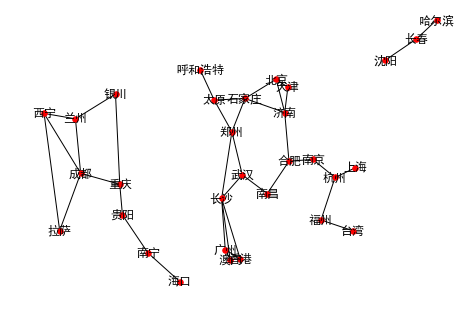

In [30]:
nx.draw(city_connection_with_road, city_location, with_labels=True, node_size=30)

### BFS 搜索路径

In [31]:
from collections import defaultdict

In [32]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [33]:
simple_connection_info = defaultdict(list)

In [34]:
simple_connection_info.update(simple_connection_info_src)

In [35]:
simple_connection_info

defaultdict(list,
            {'北京': ['太原', '沈阳'],
             '太原': ['北京', '西安', '郑州'],
             '兰州': ['西安'],
             '郑州': ['太原'],
             '西安': ['兰州', '长沙'],
             '长沙': ['福州', '南宁'],
             '沈阳': ['北京']})

In [36]:
simple_connection_info['福州']

[]

In [37]:
def bfs(graph, start):
    """广度优先搜索"""
    visited = [start]
    seen = set()
    while visited:
        node = visited.pop()
        for node_child in graph[node]:
            if node_child in seen:continue
            visited = [node_child] + visited
        seen.add(node)
    return seen

In [38]:
bfs(city_connection, "西宁")

{'兰州', '南宁', '成都', '拉萨', '海口', '西宁', '贵阳', '重庆', '银川'}

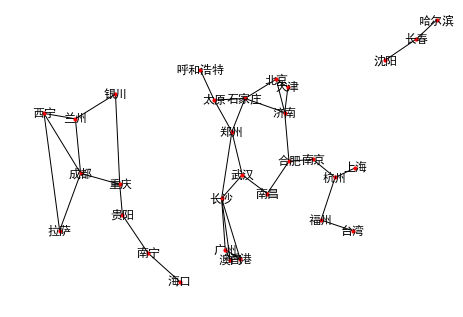

In [39]:
nx.draw(nx.Graph(city_connection), city_location, with_labels = True, node_size = 10)

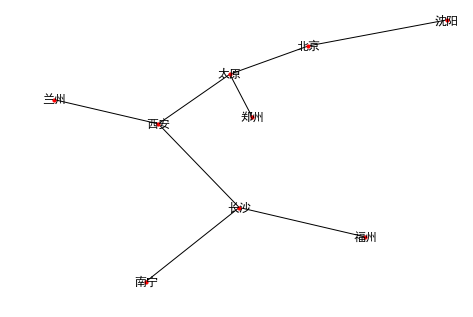

In [40]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels = True, node_size = 10)

In [41]:
def search(start, destination, connection_graph, sorted_candidate=len):
    """BFS 实现路径搜索"""
    pathes = [[start]]
    visited = set()
    res = []
    while pathes:
        path_is_fea = False
        path = pathes.pop(0) # 路线组合列表
        city = path[-1] # 单条路线最后一个城市
        if city in visited:continue
        for successor in connection_graph[city]:
            if successor in path: continue
            new_path = path + [successor]
            
            if successor == destination: 
                res.append(new_path)
                path_is_fea = True
            else:
                pathes.append(new_path)
                
        visited.add(city)
        if path_is_fea:
            visited.clear()
    return sorted_candidate(res)  # 对所有符合的路径进行排序

In [42]:
search("合肥", "太原", city_connection)

72

In [43]:
def shortest_path_first(pathes):
    """比较各条路线距离，求出最短路径"""
    if len(pathes) <= 1: return pathes
    def get_path_distance(path):
        distance = 0
        for index, station in enumerate(path[:-1]):
            distance += geo_distance(city_location[station], city_location[path[index+1]])
        # print("%s:%s" % (path, distance))
        return distance
    return sorted(pathes, key = get_path_distance, reverse = True)

In [44]:
search("合肥","太原", city_connection, sorted_candidate=shortest_path_first)

[['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '石家庄', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州', '太原'],
 ['合肥', '南昌', '武汉', '长沙', '郑州'

In [45]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [46]:
pretty_print(search('合肥', '太原', city_connection, sorted_candidate=shortest_path_first)[0])  #最远距离

合肥🚗->南昌🚗->武汉🚗->长沙🚗->郑州🚗->石家庄🚗->太原


## Assignment

1. 网络爬虫 + 正则
2. 数据处理
3. 算法的应用能力

In [47]:
import requests,re

In [48]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [49]:
response = requests.get(url)

In [50]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [51]:
pattern = re.compile(what_we_want)

In [52]:
likes = pattern.findall(response.text)

In [53]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/25828589/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page


## Machine Learning

In [54]:
from sklearn.datasets import load_boston

In [55]:
data = load_boston()

In [56]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [57]:
X, Y = data["data"], data["target"]

In [58]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [59]:
Y[1]

21.6

In [60]:
len(X[:, 0])

506

In [61]:
len(Y)

506

In [62]:
%matplotlib inline

In [63]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], Y)

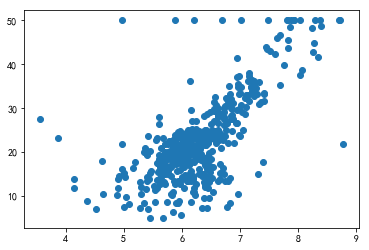

In [64]:
draw_rm_and_price()

In [65]:
import random

In [66]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

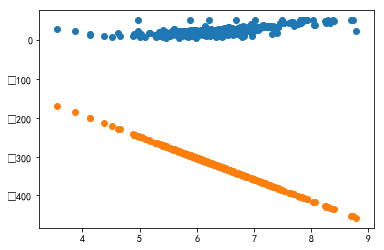

In [67]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [68]:
list(Y)

[24.0,
 21.6,
 34.7,
 33.4,
 36.2,
 28.7,
 22.9,
 27.1,
 16.5,
 18.9,
 15.0,
 18.9,
 21.7,
 20.4,
 18.2,
 19.9,
 23.1,
 17.5,
 20.2,
 18.2,
 13.6,
 19.6,
 15.2,
 14.5,
 15.6,
 13.9,
 16.6,
 14.8,
 18.4,
 21.0,
 12.7,
 14.5,
 13.2,
 13.1,
 13.5,
 18.9,
 20.0,
 21.0,
 24.7,
 30.8,
 34.9,
 26.6,
 25.3,
 24.7,
 21.2,
 19.3,
 20.0,
 16.6,
 14.4,
 19.4,
 19.7,
 20.5,
 25.0,
 23.4,
 18.9,
 35.4,
 24.7,
 31.6,
 23.3,
 19.6,
 18.7,
 16.0,
 22.2,
 25.0,
 33.0,
 23.5,
 19.4,
 22.0,
 17.4,
 20.9,
 24.2,
 21.7,
 22.8,
 23.4,
 24.1,
 21.4,
 20.0,
 20.8,
 21.2,
 20.3,
 28.0,
 23.9,
 24.8,
 22.9,
 23.9,
 26.6,
 22.5,
 22.2,
 23.6,
 28.7,
 22.6,
 22.0,
 22.9,
 25.0,
 20.6,
 28.4,
 21.4,
 38.7,
 43.8,
 33.2,
 27.5,
 26.5,
 18.6,
 19.3,
 20.1,
 19.5,
 19.5,
 20.4,
 19.8,
 19.4,
 21.7,
 22.8,
 18.8,
 18.7,
 18.5,
 18.3,
 21.2,
 19.2,
 20.4,
 19.3,
 22.0,
 20.3,
 20.5,
 17.3,
 18.8,
 21.4,
 15.7,
 16.2,
 18.0,
 14.3,
 19.2,
 19.6,
 23.0,
 18.4,
 15.6,
 18.1,
 17.4,
 17.1,
 13.3,
 17.8,
 14.0,
 14.4,
 13.4,

In [69]:
price_by_random_k_and_b

[-335.625,
 -327.15500000000003,
 -369.17499999999995,
 -358.89,
 -367.08500000000004,
 -327.65,
 -304.65999999999997,
 -313.46,
 -283.70500000000004,
 -304.21999999999997,
 -324.735,
 -304.495,
 -297.89500000000004,
 -301.195,
 -309.28000000000003,
 -294.87,
 -300.42499999999995,
 -303.45,
 -274.08000000000004,
 -288.985,
 -280.35,
 -302.075,
 -311.81,
 -293.715,
 -299.82,
 -281.945,
 -293.715,
 -306.585,
 -331.225,
 -341.07,
 -288.21500000000003,
 -307.96,
 -301.25,
 -287.555,
 -309.28000000000003,
 -300.315,
 -295.255,
 -295.75,
 -302.13,
 -336.72499999999997,
 -360.32,
 -346.34999999999997,
 -313.29499999999996,
 -315.605,
 -307.795,
 -286.51000000000005,
 -292.22999999999996,
 -305.65000000000003,
 -270.945,
 -282.11,
 -301.96500000000003,
 -310.325,
 -332.105,
 -303.89,
 -297.84,
 -372.695,
 -325.065,
 -348.88,
 -311.97499999999997,
 -299.98499999999996,
 -289.755,
 -302.13,
 -329.08000000000004,
 -345.90999999999997,
 -364.72,
 -319.95,
 -292.28499999999997,
 -297.29,
 -281.67,


上面缺点在于k, b随机的次数太少，得到最优的k,b的可能性太低

### Loss Function

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$

In [70]:
def loss(y, y_hat): # To evaluate the performance
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

## First-Method: Random generation: get best k and best b

In [71]:
X_rm = X[:, 5]

In [72]:
trying_times = 2000

min_loss = float('inf') #正无穷
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm] #随机得来的y_hat

    current_loss = loss(Y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss

        best_k, best_b = k, b
        print("When time is :{}, get best_k:{} best_b:{}, and loss is:{}".format(i, best_k, best_b, min_loss))

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


When time is :0, get best_k:-33.77522485466227 best_b:-5.177363198623738, and loss is:58537.45681550124
When time is :1, get best_k:-4.584474618165046 best_b:-67.27570947276975, and loss is:14206.660192633522
When time is :2, get best_k:4.205277886191936 best_b:76.8656793703847, and loss is:6577.83589038818
When time is :16, get best_k:4.424520372491429 best_b:5.837707243013895, and loss is:177.8437140654175
When time is :193, get best_k:0.618320115569901 best_b:20.31276557956032, and loss is:81.83726899774302
When time is :581, get best_k:10.362768655458197 best_b:-41.439504494891466, and loss is:45.715062446962484
When time is :1433, get best_k:11.071704423075374 best_b:-46.719035376362925, and loss is:45.62061737646672


In [73]:
10 ** 0.5

3.1622776601683795

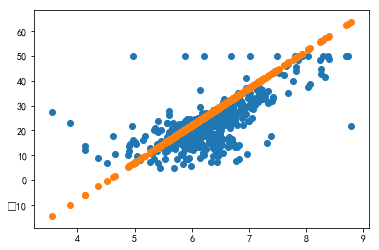

In [74]:
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 2nd-Method: Direction Adjusting

In [75]:
trying_times = 2000

min_loss = float('inf') #正无穷
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

# first element: k's change direction, second element: b's change direction
direction = [  # 方向
    (+1, -1),
    (+1, +1),
    (-1, +1),
    (-1, -1)
]

next_direction = random.choice(direction)

scalar = 0.1 # 步长
for i in range(trying_times):
    k_direction, b_direction = next_direction

    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar

    price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm] #y_hat

    current_loss = loss(Y, price_by_random_k_and_b)

    if current_loss < min_loss:
        min_loss = current_loss

        best_k, best_b = current_k, current_b
        next_direction = next_direction
        print("When time is :{}, get best_k:{} best_b:{}, and loss is:{}".format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


When time is :0, get best_k:-71.7511820982366 best_b:-89.90624339190288, and loss is:320649.10038428305
When time is :1, get best_k:-71.6511820982366 best_b:-89.80624339190288, and loss is:319820.8813319737
When time is :2, get best_k:-71.55118209823661 best_b:-89.70624339190289, and loss is:318993.73345153144
When time is :3, get best_k:-71.45118209823661 best_b:-89.6062433919029, and loss is:318167.6567429568
When time is :4, get best_k:-71.35118209823662 best_b:-89.5062433919029, and loss is:317342.6512062494
When time is :5, get best_k:-71.25118209823663 best_b:-89.4062433919029, and loss is:316518.7168414097
When time is :6, get best_k:-71.15118209823663 best_b:-89.30624339190291, and loss is:315695.8536484378
When time is :7, get best_k:-71.05118209823664 best_b:-89.20624339190292, and loss is:314874.0616273327
When time is :8, get best_k:-70.95118209823664 best_b:-89.10624339190292, and loss is:314053.3407780958
When time is :9, get best_k:-70.85118209823665 best_b:-89.006243391

When time is :275, get best_k:-44.251182098236754 best_b:-62.406243391904326, and loss is:133245.26110607953
When time is :276, get best_k:-44.15118209823675 best_b:-62.306243391904324, and loss is:132711.6143173242
When time is :277, get best_k:-44.05118209823675 best_b:-62.20624339190432, and loss is:132179.03870043636
When time is :278, get best_k:-43.95118209823675 best_b:-62.10624339190432, and loss is:131647.5342554161
When time is :279, get best_k:-43.85118209823675 best_b:-62.00624339190432, and loss is:131117.1009822631
When time is :280, get best_k:-43.75118209823675 best_b:-61.90624339190432, and loss is:130587.73888097778
When time is :281, get best_k:-43.651182098236745 best_b:-61.80624339190432, and loss is:130059.44795155978
When time is :282, get best_k:-43.551182098236744 best_b:-61.706243391904316, and loss is:129532.22819400925
When time is :283, get best_k:-43.45118209823674 best_b:-61.606243391904314, and loss is:129006.07960832611
When time is :284, get best_k:-43

When time is :630, get best_k:-8.751182098236379 best_b:-26.90624339190382, and loss is:11107.73539044865
When time is :631, get best_k:-8.65118209823638 best_b:-26.80624339190382, and loss is:10954.35461464536
When time is :632, get best_k:-8.55118209823638 best_b:-26.70624339190382, and loss is:10802.045010709511
When time is :633, get best_k:-8.45118209823638 best_b:-26.606243391903817, and loss is:10650.806578641108
When time is :634, get best_k:-8.35118209823638 best_b:-26.506243391903816, and loss is:10500.639318440228
When time is :635, get best_k:-8.25118209823638 best_b:-26.406243391903814, and loss is:10351.543230106776
When time is :636, get best_k:-8.151182098236381 best_b:-26.306243391903813, and loss is:10203.518313640829
When time is :637, get best_k:-8.051182098236382 best_b:-26.20624339190381, and loss is:10056.56456904234
When time is :638, get best_k:-7.951182098236382 best_b:-26.10624339190381, and loss is:9910.681996311312
When time is :639, get best_k:-7.851182098

如果我们想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：

#### 找对改变的方向

#### 如何找对改变的方向呢？ 

#### 2nd-method: 监督让他变化--> 监督学习

## 导数

In [76]:
loss([1, 1, 1], [2, 2, 3])

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


2.0

In [77]:
loss([1, 1, 1], [1, 1, 1])

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


0.0

In [78]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [79]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000